Authors : Rayane KADEM
This notebook demonstrates how the multi-spectrogram-fetch is realized from one audio track. 

In [84]:
#Import needed libraries
import os
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from tqdm import tqdm
import argparse
import cv2 

path = "blues.00000.wav"
            # Read the audio file

            

In [85]:
# Extract the feature
def librosa_spec(path,feature,n_fft,hop_length):
    y, sr = librosa.load(path)
    if feature == "melspectrogram":
        image = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length)
    elif feature == "mfcc":
        image = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=60)
    elif feature == "chroma_stft":
        image = librosa.feature.chroma_stft(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length)
    elif feature == "chroma_cqt":
        image = librosa.feature.chroma_cqt(y=y, sr=sr,  hop_length=hop_length)
    elif feature == "chroma_cens":
        image = librosa.feature.chroma_cens(y=y, sr=sr,  hop_length=hop_length)
    elif feature == "cqt":
                image = librosa.cqt(y=y, sr=sr, hop_length=hop_length,n_bins=60)
    # Librosa display 
    librosa.display.specshow(librosa.power_to_db(image, ref = np.max), sr =sr , hop_length = hop_length)
    # Ommit axis  
    plt.axis('off')
    plt.axis('tight')
    # Set padding to 0
    plt.tight_layout(pad=0)
    file = path[:-4]
    plt.savefig(file + feature + ".png")
    return image
            

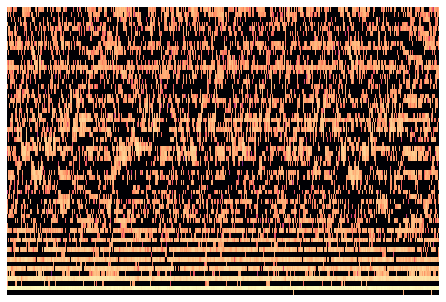

In [88]:
image= librosa_spec(path,"mfcc",1024, 512)


In [89]:
import cv2
melspec=  cv2.imread("blues.00000melspectrogram.png", cv2.IMREAD_GRAYSCALE)
mfcc = cv2.imread("blues.00000mfcc.png", cv2.IMREAD_GRAYSCALE)
cqt = cv2.imread("blues.00000cqt.png", cv2.IMREAD_GRAYSCALE)
width,height = cqt.shape
cqt = cqt.reshape(width,height,1)
mfcc = mfcc.reshape(width,height,1)
melspec = melspec.reshape(width,height,1)

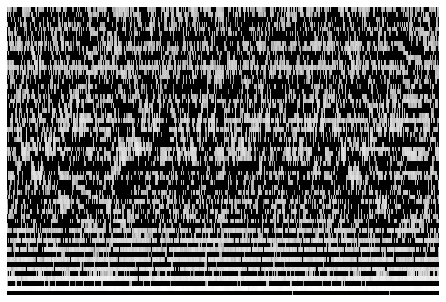

In [98]:
plt.imshow(mfcc,cmap='gray')
plt.axis('off')
plt.axis('tight')
    # Set padding to 0
plt.tight_layout(pad=0)
plt.savefig( "mfcc_gray.png")

In [99]:
new= np.concatenate((cqt,mfcc),axis=2)
new= np.concatenate((new,melspec),axis=2)

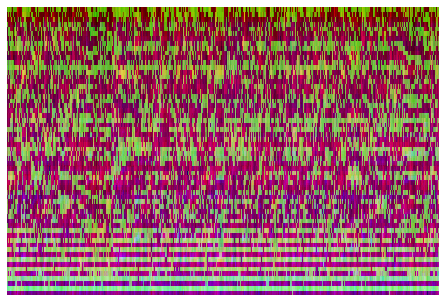

In [101]:
plt.imshow(new)
plt.axis('off')
plt.axis('tight')
    # Set padding to 0
plt.tight_layout(pad=0)
plt.savefig( "combined.png")